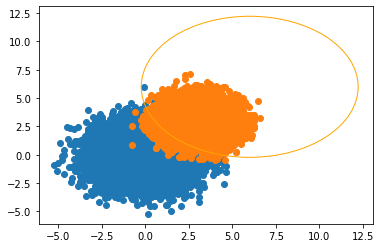

In [177]:
#Question 1 Part C, D. Part A, B is in the report
import matplotlib
import math

mu1=np.array([0,0])
mu2=np.array([3, 3])
sigma1=np.array([[2, 0], [0, 2]])
sigma2=np.array([[1, 0], [0, 1]])
distriDensity1 = pd.DataFrame(np.random.multivariate_normal(mu1, sigma1, 10000))
distriDensity2 = pd.DataFrame(np.random.multivariate_normal(mu2, sigma2, 10000))
plt.scatter(distriDensity1[0], distriDensity1[1])
plt.scatter(distriDensity2[0], distriDensity2[1])
circ = matplotlib.patches.Circle((6,6), math.sqrt(2*math.log(4)+36), color="orange", fill=False)
plt.gca().add_patch(circ)


In [238]:
#Question 1 Part D
c1, c2, misc1, misc2=0, 0, 0, 0
distriDensity1 = np.random.multivariate_normal(mu1, sigma1, 10000)
distriDensity2 = np.random.multivariate_normal(mu2, sigma2, 10000)
for x1, x2 in distriDensity1:
    tmp=((x1-6)**2)-((x2-6)**2)
    tmp1=math.sqrt(2*math.log(4)+36)
    if(tmp>tmp1):
        c1+=1
    else:
        misc1+=1
        
for x1, x2 in distriDensity2:
    tmp=((x1-6)**2)-((x2-6)**2)
    tmp1=math.sqrt(2*math.log(4)+36)
    if(tmp>tmp1):
        misc2+=1
    else:
        c2+=1

confusionMatrix=np.array([[c1, misc1], [misc2, c2]])
confusionMatrix
n=len(distriDensity1)+len(distriDensity2)
errorRate=(misc1+misc2)/n
print("Misclassification rate is \n", errorRate )
print(" Confusion Matrix is \n ", confusionMatrix)

Misclassification rate is 
 0.60905
 Confusion Matrix is 
  [[1382 8618]
 [3563 6437]]


Whitening Transform is : 
 [[-0.22882456 -0.0874032 ]
 [ 0.14142136 -0.14142136]]


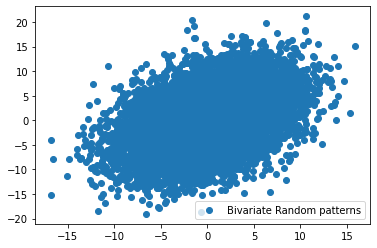

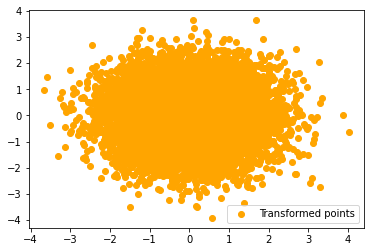

In [240]:
#question 2-Part A
originalMean=np.array([0,0])
originalVariance=np.array([[20, 10], [10, 30]])
V, Vectors=np.linalg.eig(originalVariance)
whiteningTransform=Vectors * (V**(-1/2))
print("Whitening Transform is : \n",whiteningTransform)

#Question 2 Part C, D
import matplotlib.pyplot as plt

originalMean=np.array([0,0])
originalVariance=np.array([[20, 10], [10, 30]])
X = np.random.multivariate_normal(originalMean, originalVariance, 10000).T
plt.scatter(X[0], X[1], label="Bivariate Random patterns")
plt.legend()
whiteningT=np.dot(whiteningTransform.T , X)
plt.figure()
plt.scatter(whiteningT[0], whiteningT[1], color='orange', label="Transformed points")
plt.legend()




#Question 2 part B
$p(x)\sim N(A_{w}^t\mu,I) =>$ 
$p(x)\sim N\bigg(\begin{bmatrix}-0.2288& -0.0874\\0.141421& -0.141421\end{bmatrix}^t\begin{bmatrix}0\\0\end{bmatrix},
                 \begin{bmatrix}1&0\\0&1\end{bmatrix}\bigg)$

#Question 2 Part E
In the first scatter plot we can see the points are slightly tilted, where as in the second plot the points appear to be
centered with no inclination on either side. Whitening transformation helps to transform the cordinates from an 
arbitary multivariate normal distribution to spherical one, where the covariance is proportional to identity matrix. 

0

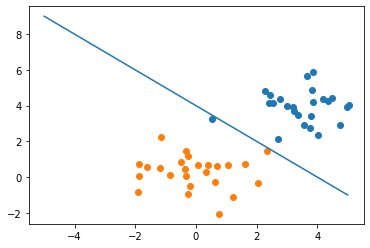

In [250]:
#Question 4 Part C


mu1=np.array([4, 4])
mu2=np.array([0, 0])
sigma1=np.array([[1, 0], [0, 1]])
sigma2=np.array([[1, 0], [0, 1]])

testRandom1=pd.DataFrame(np.random.multivariate_normal(mu1, sigma1, 25))
testRandom2=pd.DataFrame(np.random.multivariate_normal(mu2, sigma2, 25))
plt.scatter(testRandom1[0], testRandom1[1])
plt.scatter(testRandom2[0], testRandom2[1])

testSample1=list(range(-5, 6))

testSample2=[4-j for j in testSample1]

#test=testSample1+testSample2

plt.plot(testSample1, testSample2)





In [275]:
mu1=np.array([4, 4])
mu2=np.array([0, 0])
sigma1=np.array([[1, 0], [0, 1]])
sigma2=np.array([[1, 0], [0, 1]])



c1, c2, misc1, misc2=0, 0, 0, 0
#testRandom1=np.random.multivariate_normal(mu1, sigma1, 25)
#testRandom2=np.random.multivariate_normal(mu2, sigma2, 25)

for x1, x2 in testRandom1:
    if(x1+x2>4):
        c1+=1
    else:
        misc1+=1
        
for x1, x2 in testRandom2:
    if(x1+x2>4):
        misc2+=1
    else:
        c2+=1

confusionMatrix1=np.array([[c1, misc1], [misc2, c2]])
n=len(testRandom1)+len(testRandom2)
errorRate1=(misc1+misc2)/25
print("Misclassification rate is \n", errorRate1 )
print(" Confusion Matrix is \n ", confusionMatrix1)

Misclassification rate is 
 0.0
 Confusion Matrix is 
  [[25  0]
 [ 0 25]]


Misclassification rate is 
 [0.0, 0.004, 0.0045, 0.0039, 0.0046, 0.005633333333333333]


Text(0.5, 1.0, 'Error rate as the value of N changes')

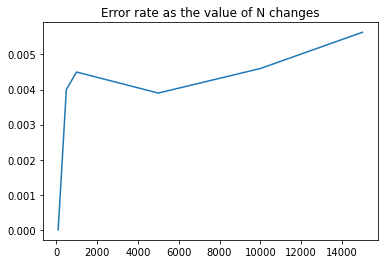

In [270]:
mu1=np.array([4, 4])
mu2=np.array([0, 0])
sigma1=np.array([[1, 0], [0, 1]])
sigma2=np.array([[1, 0], [0, 1]])



c1, c2, misc1, misc2=0, 0, 0, 0
N=[100, 500, 1000, 5000, 10000, 15000]
errors=[]
for n in N:
    testRandom1=np.random.multivariate_normal(mu1, sigma1, n)
    testRandom2=np.random.multivariate_normal(mu2, sigma2, n)
    for x1, x2 in testRandom1:
        if(x1+x2-4>0):
            c1+=1
        else:
            misc1+=1
        
    for x1, x2 in testRandom2:
        if(x1+x2-4>0):
            misc2+=1
        else:
            c2+=1

    confusionMatrix=np.array([[c1, misc1], [misc2, c2]])
    errorRate=(misc1+misc2)/(n+n)
    errors.append(errorRate)
    
print("Misclassification rate is \n", errors )
#print(" Confusion Matrix is \n ", confusionMatrix)
plt.plot(N, errors)
plt.title("Error rate as the value of N changes")

#Part E
The error rate can't can't exceed the theoritical bound even when I change the value of n, the error rate varies but
doesn't exceed the theoritical error. From the above plot we can see after n=1000 the error rate deceases and later increases when N increases to 10,000. 

Mean is 
 6.30719197
Variance is 
 1.032382731180714e-08


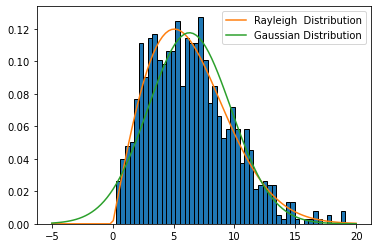

In [272]:
#Question -5 Part B
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import rayleigh 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statistics as st
from scipy.stats import laplace
from scipy.stats import norm

colnames=['X']
rayleighDistribution=pd.read_table("http://www.cse.msu.edu/~rossarun/courses/sp22/cse802/data/hw3_random_data_q1.txt", header=None, names=colnames)
newX=np.linspace(-5, 20, 100)
count=0
for i in range(0, len(rayleighDistribution)):
    count=count+(rayleighDistribution['X'][i]**2)
MLE=len(rayleighDistribution)/(count)
scale=np.sqrt(1/(2*MLE))
R = rayleigh.pdf(newX, loc=0,scale=scale)
plt.hist(rayleighDistribution,bins=50, density=True, edgecolor ="black")
plt.plot( newX, R, label="Rayleigh  Distribution")

#Question 5 Part C
meanX=np.mean(rayleighDistribution['X'])
variance=np.sqrt((sum(rayleighDistribution['X']-meanX))/len(rayleighDistribution['X']))
gaussian=norm.pdf(newX, meanX, np.std(rayleighDistribution['X'])) 
plt.plot(newX, gaussian, label="Gaussian Distribution")
plt.legend()
print("Mean is \n", meanX )
print("Variance is \n", variance )

#Question 5 Part D
Comment on which of the two distributions better “fits" the training data.

From the above plot we can see Rayleigh distribution fits the training data better than gaussian distribution, as more
data is covered and in the case of gaussian distribution the curve is narrower and doesn't fits the training data well
when compared to rayleigh distribution. 